In [1]:
from sklearn.datasets import fetch_openml

def load_mauna_loa_atmospheric_co2():
    ml_data = fetch_openml(data_id=41187)
    months = []
    ppmv_sums = []
    counts = []

    y = ml_data.data.iloc[:, 0]
    m = ml_data.data.iloc[:, 1]
    month_float = y + (m - 1) / 12
    ppmvs = ml_data.target

    for month, ppmv in zip(month_float, ppmvs):
        if not months or month != months[-1]:
            months.append(month)
            ppmv_sums.append(ppmv)
            counts.append(1)
        else:
            # aggregate monthly sum to produce average
            ppmv_sums[-1] += ppmv
            counts[-1] += 1

    months = np.asarray(months).reshape(-1)
    avg_ppmvs = np.asarray(ppmv_sums) / counts
    return months, avg_ppmvs

In [2]:
import numpy as np

import GPy
from GPy.kern import Kern
from GPy import Param, Model

In [4]:
# load dataset
x, y = load_mauna_loa_atmospheric_co2()

from sklearn import preprocessing
import random

#random.seed(23)

#idx = random.sample(range(200), 50)

x_new = (x - min(x))/(max(x)-min(x))

scaler = preprocessing.StandardScaler().fit(y.reshape(-1,1))

y_new = scaler.transform(y.reshape(-1,1))


#train_gx = x_new[idx][:,None]
#train_gy = y_new[idx] + 0.0001 * np.random.normal(0,1,50)[:,None]

train_x = x_new[:200][:,None]
train_y = y_new[:200]

test_x = x_new[200:][:,None]
test_y = y_new[200:]

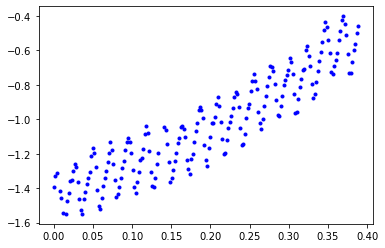

In [5]:
import matplotlib.pyplot as plt

plt.plot(train_x,train_y,'b.')

In [6]:
from deepRBF import deepRBF

d_rbf = deepRBF(input_dim=1,variance1=0.01,lengthscale=0.001)
m3 = GPy.models.GPRegression(train_x, train_y, d_rbf)
m3.optimize()
m3.optimize_restarts(num_restarts = 20)

#m3.plot([0,1])
#plt.plot(test_x,test_y,'r.')

Optimization restart 1/20, f = -338.7586878971648
Optimization restart 2/20, f = -144.562166024589
Optimization restart 3/20, f = -144.56491020893458
Optimization restart 4/20, f = -144.56492187284195
Optimization restart 5/20, f = -144.56492836031947
Optimization restart 6/20, f = -144.5649248258752
Optimization restart 7/20, f = -144.56486833050866
Optimization restart 8/20, f = -144.56488593690074
Optimization restart 9/20, f = -144.56427725910527
Optimization restart 10/20, f = -144.5649239765587
Optimization restart 11/20, f = -144.56465442960433
Optimization restart 12/20, f = -144.56491369151894
Optimization restart 13/20, f = -333.37107690901564
Optimization restart 14/20, f = -144.56488939558375
Optimization restart 15/20, f = -144.5649280837609
Optimization restart 16/20, f = -144.55717603891523
Optimization restart 17/20, f = -144.56491923016387
Optimization restart 18/20, f = -144.56490132888388
Optimization restart 19/20, f = -144.5649258160396
Optimization restart 20/20, 

In [7]:
X_test = np.linspace(0,1,199)[:,None]

mu, var = m3.predict(X_test)

X_plot = np.linspace(0,1,200)[:,None]

In [8]:
var.shape

(199, 1)

In [9]:
pred_up = mu + 1.96 * np.sqrt(var)

In [10]:
pred_down = mu - 1.96 * np.sqrt(var)

In [11]:
import matplotlib 

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

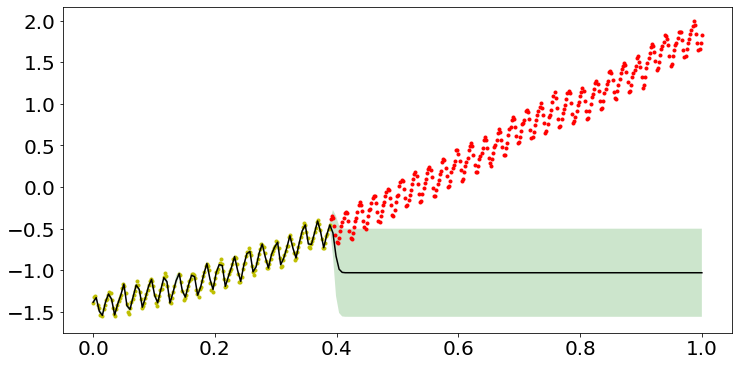

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r.')
plt.plot(train_x,train_y,'y.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu,'k-',linewidth=1.5)
#plt.title('SE[SE]')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up).flatten(),np.array(pred_down).flatten(),facecolor='g',alpha=0.2)

In [13]:
fig.savefig('demo_NSF_co2_sese.pdf', bbox_inches='tight')

In [14]:
kernel1 = GPy.kern.RBF(input_dim = 1,variance=1,lengthscale=0.01) 
kernel2 = GPy.kern.PeriodicExponential()

In [15]:
help(GPy.kern)

Help on package GPy.kern in GPy:

NAME
    GPy.kern - Kernel module the kernels to sit in.

DESCRIPTION
    .. automodule:: .src
       :members:
       :private-members:

PACKAGE CONTENTS
    src (package)

FILE
    /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/__init__.py




In [16]:
m1 = GPy.models.GPRegression(train_x, train_y, kernel1)
m1.optimize()
m1.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = -145.14032219790744
Optimization restart 2/20, f = -145.14032145188554
Optimization restart 3/20, f = -145.1403222082117
Optimization restart 4/20, f = -145.14032220779467
Optimization restart 5/20, f = -145.14032219927714
Optimization restart 6/20, f = -145.14032214703388
Optimization restart 7/20, f = -145.14032220804017
Optimization restart 8/20, f = -145.14032220779632
Optimization restart 9/20, f = -145.14032220810253
Optimization restart 10/20, f = -145.14032220778103
Optimization restart 11/20, f = -145.14032220663807
Optimization restart 12/20, f = -145.14032220801855
Optimization restart 13/20, f = -145.14032220266148
Optimization restart 14/20, f = -145.14032219463138
Optimization restart 15/20, f = -145.1403222082293
Optimization restart 16/20, f = -145.14032220723783
Optimization restart 17/20, f = -145.14032220768428
Optimization restart 18/20, f = -145.1403221969444
Optimization restart 19/20, f = -145.1403222082259
Optimization restart 20/2

In [17]:
mu1, var1 = m1.predict(X_test)

pred_up1 = mu1 + 1.96 * np.sqrt(var1)
pred_down1 = mu1 - 1.96 * np.sqrt(var1)

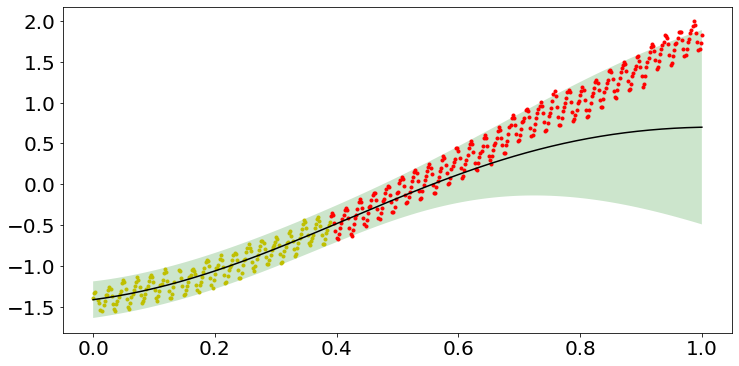

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r.')
plt.plot(train_x,train_y,'y.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu1,'k-',linewidth=1.5)
#plt.title('SE')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up1).flatten(),np.array(pred_down1).flatten(),facecolor='g',alpha=0.2)

In [19]:
fig.savefig('demo_NSF_co2_se.pdf', bbox_inches='tight')

In [20]:
kernel3 = GPy.kern.sde_RatQuad(input_dim=1)

In [21]:
model_book = GPy.models.GPRegression(train_x, train_y, kernel1+kernel2+kernel3)
model_book.optimize()
model_book.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = -145.14032166767618
Optimization restart 2/20, f = -145.14032182530332
Optimization restart 3/20, f = -145.14031832317028
Optimization restart 4/20, f = -145.14032167895715
Optimization restart 5/20, f = -145.14032098394432


 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Optimization restart 6/20, f = -463.23957763419537
Optimization restart 7/20, f = -321.6982301734389
Optimization restart 8/20, f = -145.14031607184893
Optimization restart 9/20, f = -319.2668279199335


 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:690: RuntimeWarning:overflow encountered in square
 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:695: RuntimeWarning:overflow encountered in square
 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:702: RuntimeWarning:overflow encountered in square
 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:704: RuntimeWarning:invalid value encountered in multiply
 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/periodic.py:86: RuntimeWarning:overflow encountered in true_divide
 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/periodic.py:40: RuntimeWarning:invalid value encountered in multiply
 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/periodic.py:40: RuntimeWarning:invalid value encountered in cos


Optimization restart 10/20, f = -184.34907685386324
Optimization restart 11/20, f = -145.1403174626622
Optimization restart 12/20, f = -316.64901638846925
Optimization restart 13/20, f = -145.140321938076
Optimization restart 14/20, f = -145.14032195726026
Optimization restart 15/20, f = -145.14032181195745
Optimization restart 16/20, f = -145.1403197082274
Optimization restart 17/20, f = -145.1403215008742
Optimization restart 18/20, f = -145.1403218607453
Optimization restart 19/20, f = -145.14032186012173
Optimization restart 20/20, f = -145.14032180480592


In [22]:
mu2, var2 = model_book.predict(X_test)

pred_up2 = mu2 + 1.96 * np.sqrt(var2)
pred_down2 = mu2 - 1.96 * np.sqrt(var2)

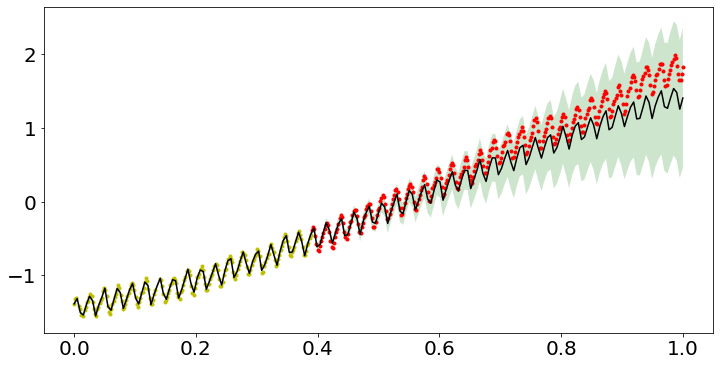

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r.')
plt.plot(train_x,train_y,'y.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu2,'k-',linewidth=1.5)
#plt.title('SE+PeriodSE+RQ')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up2).flatten(),np.array(pred_down2).flatten(),facecolor='g',alpha=0.2)

In [24]:
fig.savefig('demo_NSF_co2_book.pdf', bbox_inches='tight')

In [25]:
model_book.log_likelihood()

463.23957763419537

In [26]:
m3.log_likelihood()

338.7586878971648

In [27]:
m1.log_likelihood()

145.1403222082293